Time Series Prediction with RNN

In [1]:
import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


Loading and Visualizing the data

In [2]:
data = pd.read_csv('/content/drive/MyDrive/bicicletas.csv')
data.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [3]:
data.shape

(17414, 10)

In [4]:
data['datas'] = pd.to_datetime(data['datas'])

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

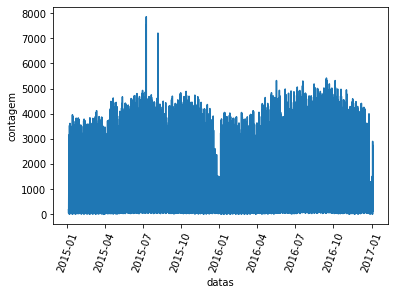

In [5]:
sns.lineplot(x = data.datas, y = data.contagem)
plt.xticks(rotation = 70)

Normalizing data

In [6]:
sc = StandardScaler()
sc.fit(data['contagem'].values.reshape(-1,1))
y = sc.transform(data['contagem'].values.reshape(-1,1))

Separate train and test values

In [7]:
train_size = int(len(data)*0.9)
y_train = y[0:train_size]
y_test = y[train_size:]

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

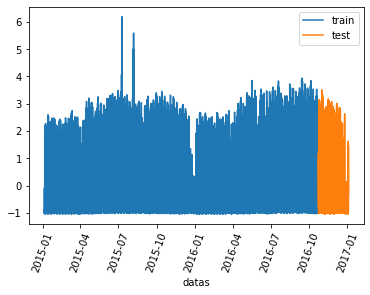

In [8]:
sns.lineplot(x = data.datas[0:train_size], y=y_train[:,0], label = 'train')
sns.lineplot(x = data.datas[train_size:], y=y_test[:,0], label = 'test')
plt.xticks(rotation = 70)

In [9]:
def separate_data(vector, n_steps):
  '''
    Input: vector: number of passengers
           n_steps: number of regressor steps
    
    output: x_new = 2D Array
            y_new = 1D - n_steps
  '''
  x_new, y_new = [], []

  for i in range(n_steps, vector.shape[0]):
    x_new.append(list(vector.loc[i-n_steps:i-1]))
    y_new.append(vector.loc[i])

  x_new, y_new = np.array(x_new), np.array(y_new)

  return x_new,y_new

In [10]:
dim = 10
x_train_new, y_train_new = separate_data(pd.DataFrame(y_train)[0],dim)
x_test_new, y_test_new = separate_data(pd.DataFrame(y_test)[0],dim)

Building RNN Model

In [11]:
x_train_new = x_train_new.reshape((x_train_new.shape[0], x_train_new.shape[1], 1))
x_test_new = x_test_new.reshape((x_test_new.shape[0], x_test_new.shape[1], 1))

In [48]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape = (x_train_new.shape[1], x_train_new.shape[2])))
model.add(tf.keras.layers.LSTM(128))
model.add(tf.keras.layers.Dense(1))

model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               66560     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [49]:
callbacks = tf.keras.callbacks.EarlyStopping(patience=3, monitor="val_loss")
history = model.fit(x_train_new, y_train_new, validation_data = (x_test_new, y_test_new),epochs = 100)

Epoch 1/100
490/490 [==============================] - 10s 14ms/step - loss: 0.2589 - val_loss: 0.0824
Epoch 2/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0783 - val_loss: 0.0343
Epoch 3/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0555 - val_loss: 0.0388
Epoch 4/100
490/490 [==============================] - 7s 13ms/step - loss: 0.0478 - val_loss: 0.0290
Epoch 5/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0427 - val_loss: 0.0333
Epoch 6/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0403 - val_loss: 0.0290
Epoch 7/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0383 - val_loss: 0.0269
Epoch 8/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0370 - val_loss: 0.0206
Epoch 9/100
490/490 [==============================] - 7s 13ms/step - loss: 0.0345 - val_loss: 0.0244
Epoch 10/100
490/490 [==============================] - 7s 14ms/step - loss: 0.03

In [50]:
y_pred_train = model.predict(x_train_new)

In [51]:
y_train.shape

(15672, 1)

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238.]), <a list of 8 Text major ticklabel objects>)

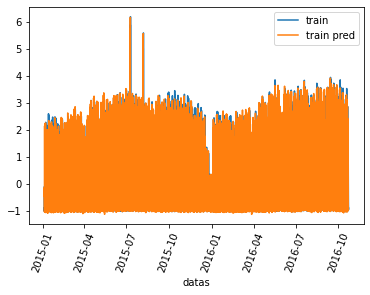

In [52]:
sns.lineplot(x = data.datas[0:train_size], y = y_train[:,0], label = 'train')
sns.lineplot(x = data.datas[0:15662], y = y_pred_train[:,0], label = 'train pred')
plt.xticks(rotation = 70)

(array([736269., 736283., 736299., 736313., 736330.]),
 <a list of 5 Text major ticklabel objects>)

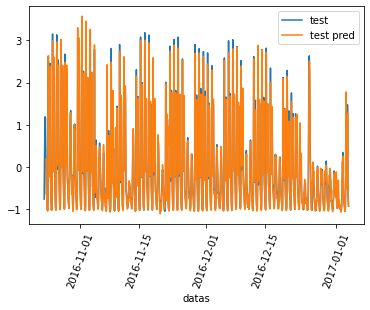

In [53]:
y_pred_test = model.predict(x_test_new)

#sns.lineplot(x = data.datas[0:train_size], y = y_train[:,0], label = 'train')
#sns.lineplot(x = data.datas[0:15662], y = y_pred_train[:,0], label = 'train pred')
sns.lineplot(x = data.datas[train_size:], y = y_test[:,0], label = 'test')
sns.lineplot(x = data.datas[train_size+dim:], y = y_pred_test[:,0], label = 'test pred')
plt.xticks(rotation = 70)

GRU

In [54]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Input(shape = (x_train_new.shape[1], x_train_new.shape[2])))
model2.add(tf.keras.layers.GRU(128))
model2.add(tf.keras.layers.Dense(1))

model2.compile(loss = 'mean_squared_error', optimizer = 'adam')
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 128)               50304     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [55]:
callbacks = tf.keras.callbacks.EarlyStopping(patience=3, monitor="val_loss")
history2 = model2.fit(x_train_new, y_train_new, validation_data = (x_test_new, y_test_new),epochs = 100)

Epoch 1/100
490/490 [==============================] - 9s 14ms/step - loss: 0.2238 - val_loss: 0.0538
Epoch 2/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0601 - val_loss: 0.0406
Epoch 3/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0463 - val_loss: 0.0298
Epoch 4/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0417 - val_loss: 0.0236
Epoch 5/100
490/490 [==============================] - 9s 19ms/step - loss: 0.0383 - val_loss: 0.0257
Epoch 6/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0368 - val_loss: 0.0213
Epoch 7/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0354 - val_loss: 0.0238
Epoch 8/100
490/490 [==============================] - 6s 11ms/step - loss: 0.0341 - val_loss: 0.0193
Epoch 9/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0324 - val_loss: 0.0177
Epoch 10/100
490/490 [==============================] - 6s 12ms/step - loss: 0.031

In [56]:
y_pred_train = model2.predict(x_train_new)

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238.]), <a list of 8 Text major ticklabel objects>)

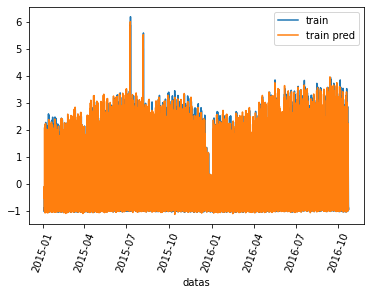

In [57]:
sns.lineplot(x = data.datas[0:train_size], y = y_train[:,0], label = 'train')
sns.lineplot(x = data.datas[0:15662], y = y_pred_train[:,0], label = 'train pred')
plt.xticks(rotation = 70)

(array([736269., 736283., 736299., 736313., 736330.]),
 <a list of 5 Text major ticklabel objects>)

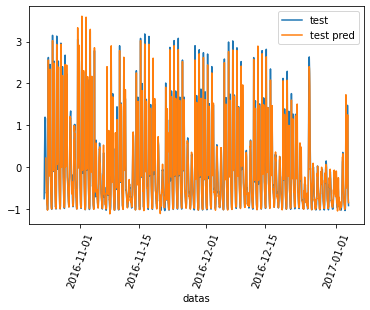

In [58]:
y_pred_test = model2.predict(x_test_new)

#sns.lineplot(x = data.datas[0:train_size], y = y_train[:,0], label = 'train')
#sns.lineplot(x = data.datas[0:15662], y = y_pred_train[:,0], label = 'train pred')
sns.lineplot(x = data.datas[train_size:], y = y_test[:,0], label = 'test')
sns.lineplot(x = data.datas[train_size+dim:], y = y_pred_test[:,0], label = 'test pred')
plt.xticks(rotation = 70)

Comparing the two

Text(0.5, 1.0, 'LSTM training')

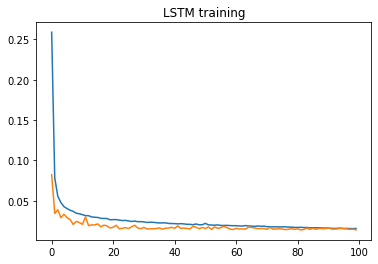

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM training')

Text(0.5, 1.0, 'GRU training')

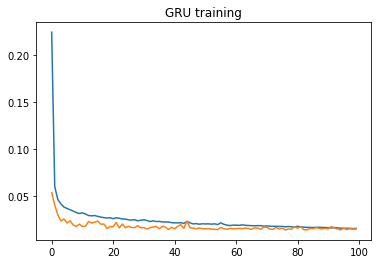

In [60]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('GRU training')